<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 3
Авторы материала: Юрий Кашницкий (@yorko) и Максим Уваров (@maxis42). Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание № 3 
## <center> Деревья решений для классификации и регрессии

**В этом задании мы разберемся с тем, как работает дерево решений в задаче регрессии, а также построим (и настроим) классифицирующие деревья решений в задаче прогнозирования сердечно-сосудистых заболеваний. 
Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1bXgaJRh4naJOGzE_Li2k50TN0kOPJdNhMtHl6H4t3Lk/edit).**

In [184]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## 1. Простой пример восстановления регрессии с помощью дерева решений

Рассмотрим следующую одномерную задачу восстановления регрессии. Неформально, надо построить функцию $a(x)$, приближающую искомую зависимость $y = f(x)$ в терминах среднеквадратичной ошибки: $min \sum_i {(a(x_i) - f(x_i))}^2$. Подробно мы рассмотрим эту задачу в следующий раз ([4-я статья курса](https://habrahabr.ru/company/ods/blog/323890/)), а пока поговорим о том, как решать эту задачу с помощью дерева решений. Предварительно прочитайте небольшой раздел ["Дерево решений в задаче регрессии"](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy-v-zadache-regressii) 3-ей статьи курса. 

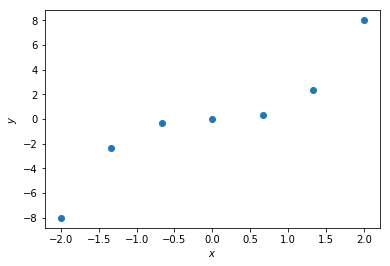

In [186]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

In [204]:
np.round(y,2)

array([-8.  , -2.37, -0.3 ,  0.  ,  0.3 ,  2.37,  8.  ])

In [208]:
np.var(np.round(y,2))

19.916257142857145

In [213]:
np.var([-8.  , -2.37, -0.3])

10.585755555555556

In [223]:
np.var([0.  ,  0.3 ,  2.37,  8.  ])

10.311168749999998

Проделаем несколько шагов в построении дерева решений. Исходя из соображений симметрии, выберем пороги для разбиения равными соответственно 0, 1.5 и -1.5. Напомним, что в случае задачи восстановления регрессии листовая вершина выдает среднее значение ответа по всем объектам обучающей выборки, попавшим в эту вершину.

Итак, начнём. Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку. Как будут выглядеть предсказания данного дерева для $x \in [-2, 2]$? Постройте соответствующий график. Тут без `sklearn` – разбираемся просто с ручкой, бумажкой и Python, если надо.

In [3]:
# Ваш код здесь

Произведем первое разбиение выборки по предикату $[x < 0]$. Получим дерево глубины 1 с двумя листьями. Постройте аналогичный график предсказаний для этого дерева.

In [4]:
# Ваш код здесь

В алгоритме построения дерева решений признак и значение порога, по которым происходит разбиение выборки, выбираются исходя из некоторого критерия. Для регрессии обычно используется дисперсионный критерий:
$$Q(X, j, t) = D(X) - \dfrac{|X_l|}{|X|} D(X_l) - \dfrac{|X_r|}{|X|} D(X_r),$$
где $X$ – выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ – разбиение выборки $X$ на две части по предикату $[x_j < t]$ (то есть по $j$-ому признаку и порогу $t$), $|X|$, $|X_l|$, $|X_r|$ - размеры соответствующих выборок, а $D(X)$ – дисперсия ответов на выборке $X$:
$$D(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j – \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2,$$
где $y_i = y(x_i)$ – ответ на объекте $x_i$. При каждом разбиении вершины выбираются признак $j$ и значение порога $t$, максимизирующие значение функционала $Q(X, j, t)$.

В нашем случае признак всего один, поэтому $Q$ зависит только от значения порога $t$ (и ответов выборки в данной вершине). 

Постройте график функции $Q(X, t)$ в корне в зависимости от значения порога $t$ на отрезке $[-1.9, 1.9]$.

In [220]:
def regression_var_criterion(X, t):
    X_size = np.size(X)
    var_size = np.var(X ** 3)
    X1 = np.extract(X < t, X)
    X1_size = np.size(X1)
    X1_var = np.var(X1 ** 3)
    X2 = np.extract(X >= t, X)
    X2_size = np.size(X2)
    X2_var = np.var(X2 ** 3)
    return var_size - (X1_size/X_size)*X1_var - (X2_size/X_size)*X2_var

In [221]:
# Ваш код здесь
regression_var_criterion(X=X, t=0)

9.481481481481481

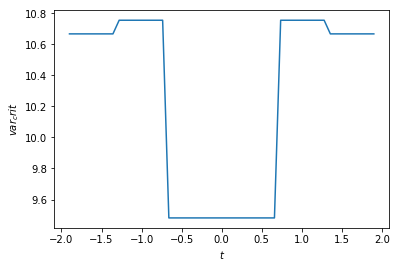

In [227]:
t = np.linspace(-1.9, 1.9)
ty = np.array([])
for each in t:
    ty = np.append(ty, regression_var_criterion(X=X,t=each))

plt.plot(t, ty)
plt.xlabel(r'$t$')
plt.ylabel(r'$var_crit$');

**<font color='red'>Вопрос 1.</font> Оптимально ли с точки зрения дисперсионного критерия выбранное нами значение порога $t = 0$?**
- <font color='green' size=5>Да</font>
- Нет

Теперь произведем разбиение в каждой из листовых вершин. В левой (соответствующей ветви $x < 0$) – по предикату $[x < -1.5]$, а в правой (соответствующей ветви $x \geqslant 0$) – по предикату $[x < 1.5]$. Получится дерево глубины 2 с 7 вершинами и 4 листьями. Постройте график предсказаний этого дерева для $x \in [-2, 2]$.

In [7]:
# Ваш код здесь


**<font color='red'>Вопрос 2.</font> Из какого числа отрезков состоит график (необходимо считать как горизонтальные, так и вертикальные прямые), изображающий предсказания построенного дерева на отрезке [-2, 2]?**
- <font color='green' size=5>5</font>
- 6
- 7
- 8

## 2. Построение дерева решений для прогноза сердечно-сосудистых заболеваний
Считаем в `DataFrame` знакомый нам набор данных по сердечно-сосудистым заболеваниям. 

In [156]:
df = pd.read_csv('../mlcourse_open/data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')

In [130]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,Age years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,1,0,50.357290,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,0,0,1,1,55.381246,0,0,1,1,0,0
2,18857,1,165,64.0,130,70,0,0,0,1,51.627652,0,0,1,1,0,0
3,17623,2,169,82.0,150,100,0,0,1,1,48.249144,1,0,0,1,0,0
4,17474,1,156,56.0,100,60,0,0,0,0,47.841205,1,0,0,1,0,0


Сделайте небольшие преобразования признаков: постройте признак "возраст в годах" (полных лет), а также постройте по 3 бинарных признака на основе `cholesterol` и `gluc`, где они, соответственно, равны 1, 2 или 3. Эта техника называется dummy-кодированием или One Hot Encoding (OHE), удобней всего в данном случае использовать `pandas.get_dummmies`. Исходные признаки `cholesterol` и `gluc` после кодирования использовать не нужно.

In [157]:
# Ваш код здесь
df['Age years'] = df['age']/365.25
df = pd.get_dummies(df, columns=['cholesterol', 'gluc'])

Разбейте выборку на обучающую и отложенную (holdout) части в пропорции 7/3. Для этого используйте метод `sklearn.model_selection.train_test_split`, зафиксируйте у него `random_state`=17.

In [158]:
y = df['cardio']
df.drop('cardio', axis=1, inplace=True)

In [159]:
X_train, X_valid, y_train, y_valid = train_test_split(df.values, y, test_size=0.3, random_state=17)

Обучите на выборке `(X_train, y_train)` дерево решений с ограничением на максимальную глубину в 3. Зафиксируйте у дерева `random_state=17`. Визуализируйте дерево с помошью `sklearn.tree.export_graphviz`, `dot` и `pydot`. Пример дан в [статье](https://habrahabr.ru/company/ods/blog/322534/) под спойлером "Код для отрисовки дерева". Названия файлов писать без кавычек, для того чтобы работало в jupyter notebook. Обратите внимание, что команды в Jupyter notebook, начинающиеся с восклицательного знака – это терминальные команды (которые мы обычно запускаем в терминале/командной строке).

In [160]:
# Ваш код здесь
simple_tree = DecisionTreeClassifier(max_depth=3, random_state=17)
simple_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [161]:
from sklearn.tree import export_graphviz
export_graphviz(simple_tree, feature_names=df.columns, 
out_file='simple_tree.dot', filled=True)
# для этого понадобится библиотека pydot (pip install pydot)

!dot -Tpng simple_tree.dot -o simple_tree.png

<img src='simple_tree.png'>

**<font color='red'>Вопрос 3.</font> Какие 3 признака задействуются при прогнозе в построенном дереве решений? (то есть эти три признака "можно найти в дереве")**
- weight, height, gluc=3
- smoke, age, gluc=3
- age, weight, chol=3
- <font color='green' size=5>age, ap_hi, chol=3</font>

Сделайте с помощью обученного дерева прогноз для отложенной выборки `(X_valid, y_valid)`. Посчитайте долю верных ответов (accuracy).

In [162]:
# Ваш код здесь
x_predict = simple_tree.predict(X_valid)
acc1 = simple_tree.score(X_valid, y_valid)
acc1

0.7212857142857143

Теперь на кросс-валидации по выборке  `(X_train, y_train)`  настройте глубину дерева, чтобы повысить качество модели. Используйте GridSearchCV, 5-кратную кросс-валидацию. Зафиксируйте у дерева `random_state`=17. Перебирайте параметр `max_depth` от 2 до 10. 

In [163]:
tree_params = {'max_depth': list(range(2, 11))}
tree_grid = GridSearchCV(simple_tree, tree_params, cv=5, scoring='accuracy') # Ваш код здесь

In [164]:
%time
tree_grid.fit(X_train, y_train)

Wall time: 0 ns


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [165]:
tree_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

Нарисуйте график того, как меняется средняя доля верных ответов на кросс-валидации в зависимости от значения `max_depth`.

In [166]:
df1 = pd.DataFrame(tree_grid.cv_results_['params'])
df1

,max_depth
0,2
1,3
2,4
3,5
4,6
5,7
6,8
7,9
8,10


In [167]:
tree_grid.cv_results_['split0_test_score']

array([0.71156004, 0.72206918, 0.72543618, 0.72492603, 0.72604836,
       0.72625242, 0.72410978, 0.72206918, 0.71921233])

In [168]:
for i in range(0,5):
    df1['split{}_test_score'.format(i)] = tree_grid.cv_results_['split{}_test_score'.format(i)]

In [169]:
df1

,max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,2,0.711560,0.713265,0.717551,0.713571,0.721604
1,3,0.722069,0.725612,0.732653,0.723980,0.734259
2,4,0.725436,0.727653,0.734184,0.727755,0.737422
3,5,0.724926,0.727143,0.736224,0.728367,0.738137
4,6,0.726048,0.727755,0.737449,0.730204,0.738341
5,7,0.726252,0.727551,0.734082,0.728776,0.735075
6,8,0.724110,0.727347,0.732041,0.728673,0.735585
7,9,0.722069,0.723673,0.733571,0.727959,0.733136
8,10,0.719212,0.721939,0.729490,0.726327,0.733136


In [170]:
df1['test_score'] = df1['split0_test_score'] + df1['split1_test_score'] + \
        df1['split2_test_score'] + df1['split3_test_score'] + df1['split4_test_score']

In [171]:
df1['test_score'] = df1['test_score']/5

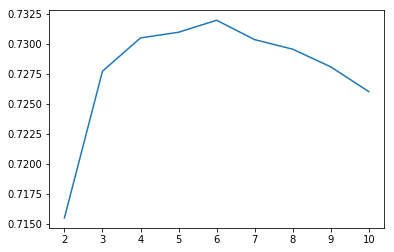

In [172]:
import matplotlib.pyplot as plt

plt.plot(df1['max_depth'], df1['test_score'])

Выведите лучшее значение `max_depth`, то есть такое, при котором среднее значение метрики качества на кросс-валидации максимально. Посчитайте также, какова теперь доля верных ответов на отложенной выборке. Все это можно сделать с помощью обученного экземпляра класса `GridSearchCV`.

In [173]:
# Ваш код здесь
acc2 =tree_grid.score(X_valid, y_valid)
acc2

0.7258095238095238

In [174]:
acc1, acc2, (acc2 - acc1)*100/acc1

(0.7212857142857143, 0.7258095238095238, 0.6271869016967003)

**<font color='red'>Вопрос 4.</font> Имеется ли на кривой валидации по максимальной глубине дерева пик `accuracy`, если перебирать `max_depth` от 2 до 10? Повысила ли настройка глубины дерева качество классификации (accuracy) более чем на 1% на отложенной выборке (надо посмотреть на выражение (acc2 - acc1) / acc1 * 100%, где acc1 и acc2 – доли верных ответов на отложенной выборке до и после настройки max_depth соответственно)?**
- да, да
- <font color='green' size=5>да, нет</font>
- нет, да
- нет, нет

Обратимся опять (как и в 1 домашке) к картинке, демонстрирующей шкалу SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет.
<img src='../mlcourse_open/img/SCORE2007.png' width=70%>

Создайте бинарные признаки, примерно соответствующие этой картинке:
- $age \in [45,50), \ldots age \in [60,65) $ (4 признака)
- верхнее артериальное давление: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 признака)

Если значение возраста или артериального давления не попадает ни в один из интервалов, то все бинарные признаки будут равны нулю. Далее будем строить дерево решений с этим признаками, а также с признаками ``smoke``, ``cholesterol``  и ``gender``. Из признака ``cholesterol`` надо сделать 3 бинарных, соотв-х уникальным значениям признака ( ``cholesterol``=1,  ``cholesterol``=2 и  ``cholesterol``=3), эта техника называется dummy-кодированием или One Hot Encoding (OHE). Признак ``gender`` надо перекодировать: значения 1 и 2 отобразить на 0 и 1. Признак лучше переименовать в ``male`` (0 – женщина, 1 – мужчина). В общем случае кодирование значений делает ``sklearn.preprocessing.LabelEncoder``, но в данном случае легко обойтись и без него.

Итак, дерево решений строится на 12 бинарных признаках (исходные признаки не берем).

Постройте дерево решений с ограничением на максимальную глубину = 3 и обучите его на всей исходной обучающей выборке. Используйте `DecisionTreeClassifier`, на всякий случай зафикисровав `random_state=17`, остальные аргументы (помимо `max_depth` и `random_state`) оставьте по умолчанию. 

**<font color='red'>Вопрос 5.</font> Какой бинарный признак из 12 перечисленных оказался самым важным для обнаружения ССЗ, то есть поместился в вершину построенного дерева решений?**
- Верхнее артериальное давление от 160 до 180 (мм рт.ст.)
- Пол мужской / женский
- <font color='green' size=5>Верхнее артериальное давление от 140 до 160 (мм рт.ст.)</font>
- Возраст от 50 до 55 (лет)
- Курит / не курит
- Возраст от 60 до 65 (лет)

In [176]:
# Ваш код здесь
df['age4550'] = df['Age years'].map(lambda x: 1 if (x >= 45) & (x < 50) else 0)
df['age5055'] = df['Age years'].map(lambda x: 1 if (x >= 50) & (x < 55) else 0)
df['age5560'] = df['Age years'].map(lambda x: 1 if (x >= 55) & (x < 60) else 0)
df['age6065'] = df['Age years'].map(lambda x: 1 if (x >= 60) & (x < 65) else 0)

df['ap_hi_120_140'] = df['ap_hi'].map(lambda x: 1 if (x>= 120) & (x < 140) else 0)
df['ap_hi_140_160'] = df['ap_hi'].map(lambda x: 1 if (x>= 140) & (x < 160) else 0)
df['ap_hi_160_180'] = df['ap_hi'].map(lambda x: 1 if (x>= 160) & (x < 180) else 0)

df['male'] = df['gender'].map({1: '0', 2: '1'})

TARGET = y

df.drop(['gender', 'height', 'weight', 'ap_hi', 'ap_lo',
         'Age years', 'alco', 'active', 'age', 'gluc_1', 'gluc_2', 'gluc_3'], axis=1, inplace=True)

df.shape, TARGET.shape

((70000, 12), (70000,))

In [178]:
t5_tree = DecisionTreeClassifier(max_depth=3, random_state=17)

In [179]:
t5_tree.fit(df, TARGET)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [180]:
from sklearn.tree import export_graphviz
export_graphviz(t5_tree, feature_names=df.columns, 
out_file='t5_tree.dot', filled=True)
# для этого понадобится библиотека pydot (pip install pydot)

!dot -Tpng t5_tree.dot -o t5_tree.png

<img src='t5_tree.png'>